In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [6]:
print("Customers Dataset Info:")
print(customers.info(), "\n")
print("Products Dataset Info:")
print(products.info(), "\n")
print("Transactions Dataset Info:")
print(transactions.info(), "\n")

Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None 

Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None 

Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #  

In [7]:
print("First few rows of Customers Dataset:")
print(customers.head(), "\n")

print("First few rows of Products Dataset:")
print(products.head(), "\n")

print("First few rows of Transactions Dataset:")
print(transactions.head(), "\n")

First few rows of Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 

First few rows of Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31 

First few rows of Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P

In [8]:
print("Missing Values in Customers Dataset:")
print(customers.isnull().sum(), "\n")

print("Missing Values in Products Dataset:")
print(products.isnull().sum(), "\n")

print("Missing Values in Transactions Dataset:")
print(transactions.isnull().sum(), "\n")

Missing Values in Customers Dataset:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 

Missing Values in Products Dataset:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 

Missing Values in Transactions Dataset:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64 



In [9]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [10]:
print("Descriptive statistics for Customers Dataset:")
print(customers.describe(include='all'), "\n")

print("Descriptive statistics for Products Dataset:")
print(products.describe(include='all'), "\n")

print("Descriptive statistics for Transactions Dataset:")
print(transactions.describe(), "\n")

Descriptive statistics for Customers Dataset:
       CustomerID      CustomerName         Region           SignupDate
count         200               200            200                  200
unique        200               200              4                  NaN
top         C0001  Lawrence Carroll  South America                  NaN
freq            1                 1             59                  NaN
mean          NaN               NaN            NaN  2023-07-19 08:31:12
min           NaN               NaN            NaN  2022-01-22 00:00:00
25%           NaN               NaN            NaN  2022-09-26 12:00:00
50%           NaN               NaN            NaN  2023-08-31 12:00:00
75%           NaN               NaN            NaN  2024-04-12 12:00:00
max           NaN               NaN            NaN  2024-12-28 00:00:00 

Descriptive statistics for Products Dataset:
       ProductID            ProductName Category       Price
count        100                    100      100  100.

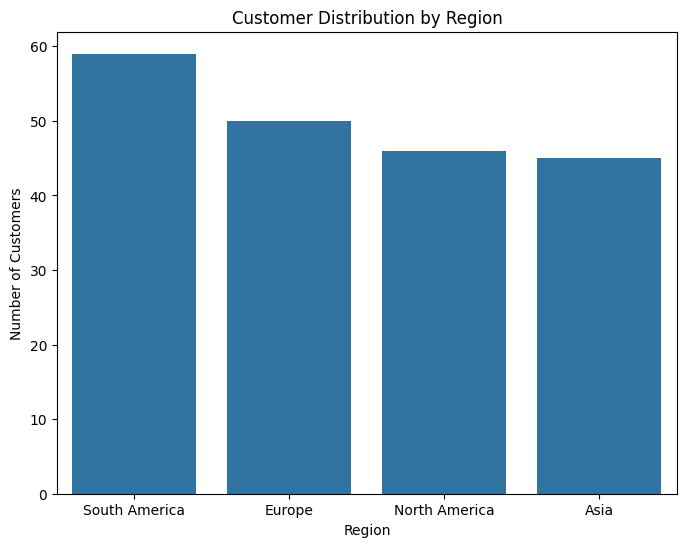

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(data=customers, x='Region', order=customers['Region'].value_counts().index)
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

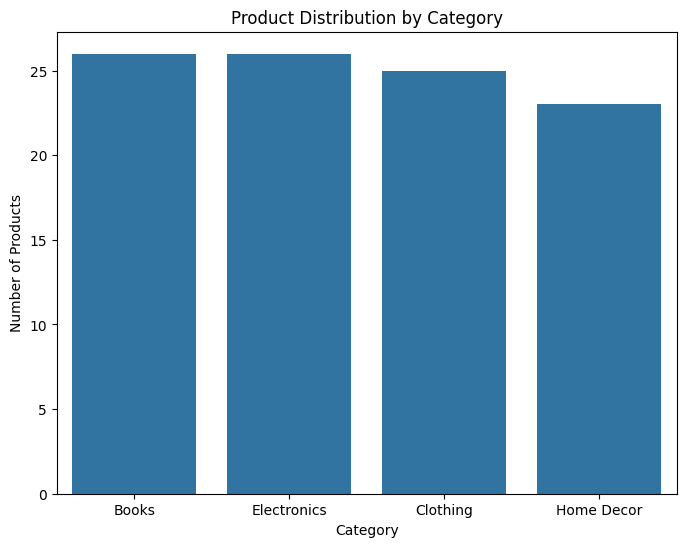

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(data=products, x='Category', order=products['Category'].value_counts().index)
plt.title('Product Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.show()

In [13]:
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()

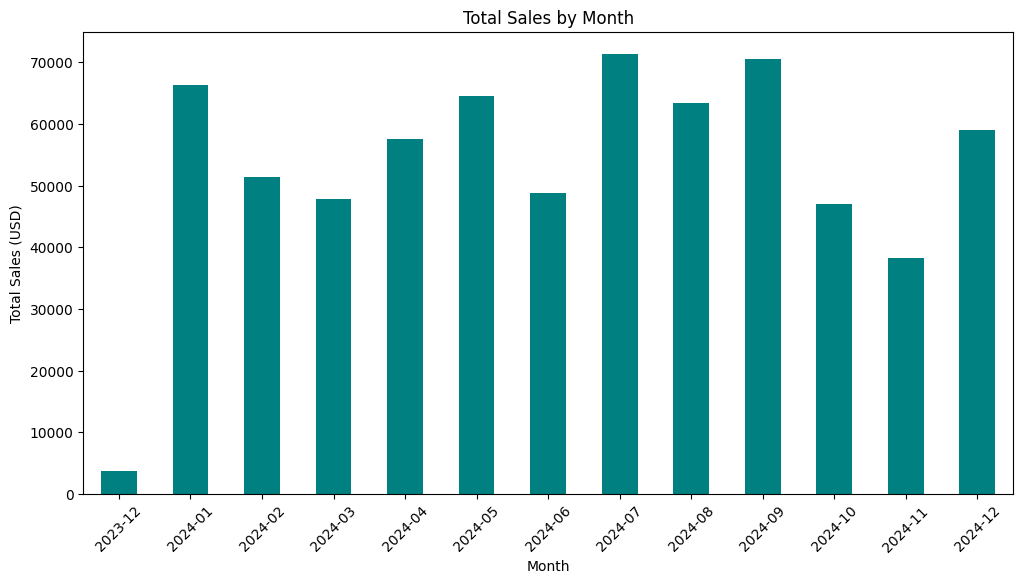

In [14]:
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar', color='teal')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.show()

In [15]:
region_sales = transactions.merge(customers, on='CustomerID').groupby('Region')['TotalValue'].sum()

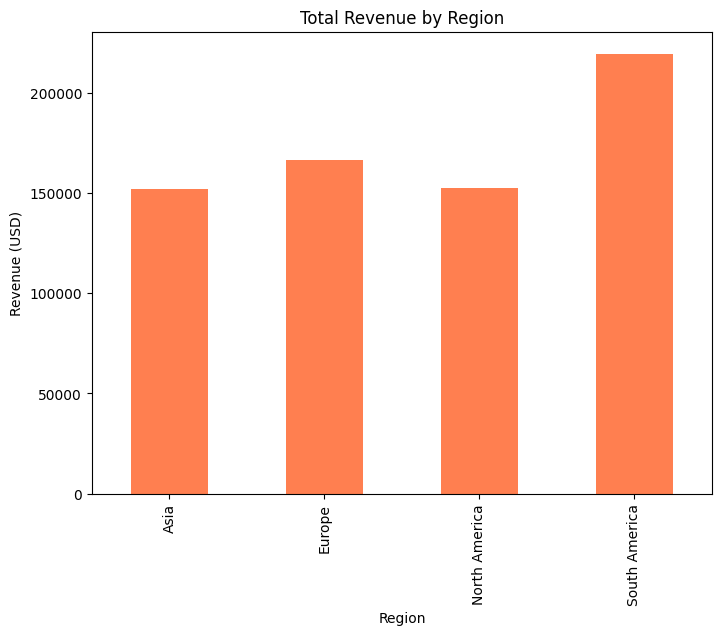

In [16]:
plt.figure(figsize=(8, 6))
region_sales.plot(kind='bar', color='coral')
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Revenue (USD)')
plt.show()

In [17]:
customer_region_counts = customers['Region'].value_counts()
top_region = customer_region_counts.idxmax()
top_region_count = customer_region_counts.max()
print(f"Insight 1: The region with the highest number of customers is {top_region} with {top_region_count} customers.")

Insight 1: The region with the highest number of customers is South America with 59 customers.


In [18]:
top_product_quantity = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(1)
top_product_id = top_product_quantity.index[0]
top_product_name = products[products['ProductID'] == top_product_id]['ProductName'].values[0]
top_product_quantity_value = top_product_quantity.values[0]
print(f"Insight 2: The top-selling product by quantity is '{top_product_name}' with {top_product_quantity_value} units sold.")

Insight 2: The top-selling product by quantity is 'SoundWave Jeans' with 46 units sold.


In [19]:
top_month = monthly_sales.idxmax()
top_month_sales = monthly_sales.max()
print(f"Insight 3: The month with the highest total sales is {top_month} with ${top_month_sales:.2f} in revenue.")

Insight 3: The month with the highest total sales is 2024-07 with $71366.39 in revenue.


In [20]:
customer_revenue = transactions.groupby('CustomerID')['TotalValue'].sum()
top_10_customers_revenue = customer_revenue.sort_values(ascending=False).head(10).sum()
total_revenue = transactions['TotalValue'].sum()
top_10_percentage = (top_10_customers_revenue / total_revenue) * 100
print(f"Insight 4: The top 10 customers contribute {top_10_percentage:.2f}% of the total revenue.")


Insight 4: The top 10 customers contribute 11.02% of the total revenue.


In [21]:
category_sales = transactions.merge(products, on='ProductID').groupby('Category')['TotalValue'].sum()
category_quantity = transactions.merge(products, on='ProductID').groupby('Category')['Quantity'].sum()
average_purchase_value = category_sales / category_quantity
print(f"Insight 5: Average purchase value by category:\n{average_purchase_value}\n")

Insight 5: Average purchase value by category:
Category
Books          282.154875
Clothing       281.645186
Electronics    288.330941
Home Decor     236.140736
dtype: float64



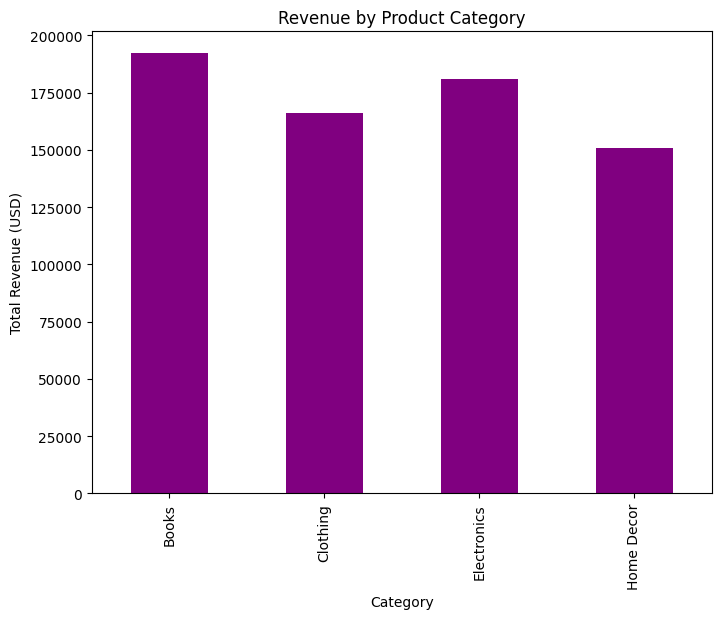

In [22]:
plt.figure(figsize=(8, 6))
category_sales.plot(kind='bar', color='purple')
plt.title('Revenue by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue (USD)')
plt.show()